In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
!pip install fancyimpute
from fancyimpute import KNN
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/train.csv')

In [ ]:
dataset_cols=['student_id','BI DS S2','Adm BD TP S2','Adm BD DS S2','Tech Index TP S2','Tech Index DS S2','Prog web TP S2','Prog web DS S2', 'Test log TP S2','Test DS S2','Compilation TP S2','Compilation DS S2','IA TP S2','IA DS S2','Droit Inf DS S2','Proj federe DS S2', 'Anglais DS S2','Vision Ord TP S2', 'Vision Ord DS S2','ERP TP S2','ERP DS S2','Proba TP S1','Proba DS S1','Proba EX S1','Proba M S1','Proba C S1','TLA DS S1','TLA EX S1','TLA M S1','TLA C S1','Graphe DS S1','Graphe EX S1','Graphe M S1', 'Graphe C S1','sem1_M_module_Automates et optimisation','sem1_C_module_Automates et optimisation','Ing BD TP S1','Ing BD DS S1','Ing BD EX S1','Ing BD M S1','Ing BD Cr S1','Réseaux TP S1','Réseaux DS S1','Réseaux EX S1','Réseaux M S1','Réseaux Cr S1','sem1_M_module_Bases de données et réseaux','sem1_C_module_Bases de données et réseaux','Gestion entreprise DS S1','Gestion entreprise EX S1','Gestion entreprise M S1','Gestion entreprise Cr S1','Anglais DS S1','Anglais EX S1','Anglais M S1','Anglais Cr S1','sem1_M_module_Langue et culture','sem1_C_module_Langue et culture','UML DS S1','UML EX S1','UML M S1','UML Cr S1','Java TP S1','Java DS S1','Java EX S1','Java M S1','Java Cr S1', 'sem1_M_module_CPOO', 'sem1_C_module_CPOO','SIRS TP S1','SIRS DS S1','SIRS EX S1','SIRS M S','SIRS Cr S1','OTC TP S2','OTC DS S2','OTC EX S2','OTC M S2','OTC Cr S2', 'final_Moy S1','final_credit S1','final_Moyenne générale']
df.columns = dataset_cols

In [ ]:
df = df_lou
df[df == -1]= np.nan
knn_imputer = KNN(k=20)
df= knn_imputer.fit_transform(df)
df = pd.DataFrame(df, columns= df_lou.columns)

'df = df_lou\ndf[df == -1]= np.nan\nknn_imputer = KNN(k=20)\ndf= knn_imputer.fit_transform(df)\ndf = pd.DataFrame(df, columns= df_lou.columns)'

In [ ]:
df2=df2.drop(['Gestion entreprise DS S1','Gestion entreprise M S1','Anglais DS S1','Anglais EX S1','Adm BD TP S2','Tech Index TP S2','Prog web TP S2','Test log TP S2','Compilation TP S2','IA TP S2','Droit Inf DS S2','Anglais DS S2','Vision Ord TP S2','ERP TP S2','Proba TP S1','Proba C S1','TLA C S1','Graphe C S1','sem1_C_module_Automates et optimisation','Ing BD TP S1','Réseaux TP S1','Réseaux Cr S1','sem1_C_module_Bases de données et réseaux','Gestion entreprise Cr S1','Anglais Cr S1','sem1_C_module_Langue et culture','UML Cr S1','Java TP S1','Java Cr S1','sem1_C_module_CPOO','SIRS TP S1','SIRS Cr S1','OTC TP S2','OTC Cr S2'], axis=1)
df=df.drop(['Proba C S1','TLA C S1','Graphe C S1','sem1_C_module_Automates et optimisation','Ing BD Cr S1','Réseaux Cr S1','sem1_C_module_Bases de données et réseaux', 'Gestion entreprise Cr S1','Anglais Cr S1','sem1_C_module_Langue et culture','UML Cr S1','Java Cr S1','sem1_C_module_CPOO','SIRS Cr S1','OTC Cr S2', 'final_credit S1'], axis=1)

In [ ]:
#shuffling the data
df = df.sample(frac=1).reset_index(drop=True)
df= df.reindex(np.random.permutation(df.index))
df_new = df
df_new.head()

# Train, validate

In [ ]:
train, validate = train_test_split(df, test_size=0.2, train_size=0.8, random_state=25, shuffle=False)

In [ ]:
X_train, y_train = train.iloc[:,:-1], train.iloc[:, -1].values.reshape(-1, 1)
X_validate, y_validate = validate.iloc[:,:-1], validate.iloc[:, -1].values.reshape(-1,1)

In [ ]:
normalizer = tf.keras.layers.Normalization(input_shape=(81,), axis= None)
normalizer.adapt(X_train)

# Linear Model:

In [ ]:
x_train_lr, y_train_lr = train['final_Moy S1'].values.reshape(-1, 1) , train['final_Moyenne générale']
x_validate_lr, y_validate_lr = validate['final_Moy S1'].values.reshape(-1, 1) , validate['final_Moyenne générale']

In [ ]:
reg_model = LinearRegression()
reg_model.fit(x_train_lr, y_train_lr)
y_pred_lr = reg_model.predict(x_validate_lr)
loss_lr_supp = np.mean(abs((y_validate_lr-y_pred_lr)))
loss_lr_supp 

0.7549690624722432

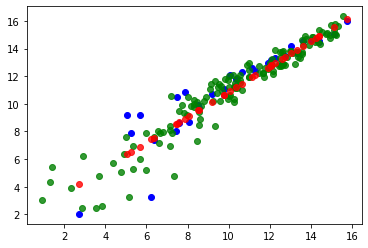

In [ ]:
plt.scatter(x_validate_lr, y_validate_lr, color = 'blue')
plt.scatter(x_train_lr, y_train_lr, color = 'green', alpha=0.8)
plt.scatter(x_validate_lr, y_pred_lr, color = 'red', alpha=0.8)
plt.show()

# Neural Net

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig = plt.subplots(1, 2, figsize= (12, 4))
  ax1.plot(history.history['loss'],label = 'loss')
  ax1.plot(history.history['val_loss'],label = 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel("MAE")
  ax1.legend()
  ax2.plot(history.history['accuracy'],label = 'loss')
  ax2.plot(history.history['val_accuracy'],label = 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel("accuracy")
  ax2.legend()
  ax1.grid(True)
  plt.show()

'def plot_history(history):\n  fig = plt.subplots(1, 2, figsize= (12, 4))\n  ax1.plot(history.history[\'loss\'],label = \'loss\')\n  ax1.plot(history.history[\'val_loss\'],label = \'val_loss\')\n  ax1.set_xlabel(\'Epoch\')\n  ax1.set_ylabel("MAE")\n  ax1.legend()\n  ax2.plot(history.history[\'accuracy\'],label = \'loss\')\n  ax2.plot(history.history[\'val_accuracy\'],label = \'val_accuracy\')\n  ax2.set_xlabel(\'Epoch\')\n  ax2.set_ylabel("accuracy")\n  ax2.legend()\n  ax1.grid(True)\n  plt.show()'

In [ ]:
def train_model(X_train, y_train, node_nbr_l1, node_nbr_l2, node_nbr_l3, node_nbr_l4, node_nbr_l5, dropout_prob, alpha):
  nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(node_nbr_l1, input_shape=(81,)),
        tf.keras.layers.Dense(node_nbr_l2, activation='relu'),
        tf.keras.layers.Dense(node_nbr_l3, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(node_nbr_l4, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(node_nbr_l5,),
        tf.keras.layers.Dense(1)])
  nn_model.compile(optimizer = tf.keras.optimizers.Adam(alpha), loss= "mean_squared_error", metrics = ["mean_absolute_error"])

  history = nn_model.fit(
  X_train, y_train, epochs = 984, batch_size = 200 )
  return nn_model, history

In [ ]:
node_nbr_l1 = 1024
node_nbr_l2 = 1024
node_nbr_l3 = 1024
node_nbr_l4 = 500
node_nbr_l5 = 500
alpha =0.00001
dropout_prob = 0.1
nn_model, history = train_model(df.iloc[:, :-1], df.iloc[:, -1], node_nbr_l1, node_nbr_l2, node_nbr_l3, node_nbr_l4, node_nbr_l5, dropout_prob, alpha)
plot_history(history)

Epoch 1/984
1/1 [==============================] - 1s 1s/step - loss: 189.6520 - mean_absolute_error: 13.0741
Epoch 2/984
1/1 [==============================] - 0s 104ms/step - loss: 165.6661 - mean_absolute_error: 12.2247
Epoch 3/984
1/1 [==============================] - 0s 93ms/step - loss: 137.4459 - mean_absolute_error: 10.9806
Epoch 4/984
1/1 [==============================] - 0s 99ms/step - loss: 111.0000 - mean_absolute_error: 9.8143
Epoch 5/984
1/1 [==============================] - 0s 95ms/step - loss: 94.9135 - mean_absolute_error: 8.9237
Epoch 6/984
1/1 [==============================] - 0s 94ms/step - loss: 77.3384 - mean_absolute_error: 7.9140
Epoch 7/984
1/1 [==============================] - 0s 100ms/step - loss: 59.8808 - mean_absolute_error: 6.8816
Epoch 8/984
1/1 [==============================] - 0s 108ms/step - loss: 48.8350 - mean_absolute_error: 6.0460
Epoch 9/984
1/1 [==============================] - 0s 115ms/step - loss: 39.4837 - mean_absolute_error: 5.3374
E

In [ ]:
epochs = 1000
minimal_loss_value = float('inf')
efficient_model = None
for node_nbr_l1 in [10,22,32,40,64,128]:
  for node_nbr_l2 in [10,22,32,40,64,128]:
    for node_nbr_l3 in [10,22,32,40,64,128]:
      for batch_size in [32, 64, 128]:
        for alpha in [0.001, 0.00005, 0.0001]:
          for dropout_prob in [0, 0.1]:
            print(f" node_nbr_l1= {node_nbr_l1} node_nbr_l2= {node_nbr_l2} node_nbr_l3= {node_nbr_l3} batch size= {batch_size} learning rate = {alpha} dropout prob = {dropout_prob} ")
            model, history = train_model(X_train, y_train, node_nbr_l1, node_nbr_l2, node_nbr_l3, batch_size, dropout_prob, alpha, epochs)
            loss_value = model.evaluate(X_validate, y_validate)[0]
            if loss_value < minimal_loss_value:
              minimal_loss_value = loss_value
              efficient_model = model
              plot_history(history)

'epochs = 1000\nminimal_loss_value = float(\'inf\')\nefficient_model = None\nfor node_nbr_l1 in [10,22,32,40,64,128]:\n  for node_nbr_l2 in [10,22,32,40,64,128]:\n    for node_nbr_l3 in [10,22,32,40,64,128]:\n      for batch_size in [32, 64, 128]:\n        for alpha in [0.001, 0.00005, 0.0001]:\n          for dropout_prob in [0, 0.1]:\n            print(f" node_nbr_l1= {node_nbr_l1} node_nbr_l2= {node_nbr_l2} node_nbr_l3= {node_nbr_l3} batch size= {batch_size} learning rate = {alpha} dropout prob = {dropout_prob} ")\n            model, history = train_model(X_train, y_train, node_nbr_l1, node_nbr_l2, node_nbr_l3, batch_size, dropout_prob, alpha, epochs)\n            loss_value = model.evaluate(X_validate, y_validate)[0]\n            if loss_value < minimal_loss_value:\n              minimal_loss_value = loss_value\n              efficient_model = model\n              plot_history(history)'

In [ ]:
y_pred_t = nn_model.predict(X_train)
loss_t = np.mean(abs((y_train-y_pred_t)))
loss_t

5/5 [==============================] - 0s 7ms/step


0.5223196214017735

In [ ]:
y_pred_v = nn_model.predict(X_validate)
loss_v=np.mean(abs((y_validate-y_pred_v)))
loss_v

2/2 [==============================] - 0s 9ms/step


0.7845595682991875

In [ ]:
def calculate_pred (X_data, moy) :
  for x in range(len(X_data)):
    if (X_data.iloc[x, :]['final_Moy S1'] <= moy): # 'final_Moy S1' == 'final_Moy S1'
      col = X_data['final_Moy S1'].values.reshape(-1, 1)
      preds = reg_model.predict(col)
    else:
      preds = nn_model.predict(X_data)
  return preds

In [ ]:
interval = np.linspace(6, 12, 60)
minimal_loss_value = float('inf')
best_m= 3
for moy in interval:
  y_pred = calculate_pred(X_validate, moy)
  loss= np.mean(abs((y_validate-y_pred)))
  if loss < minimal_loss_value:
    minimal_loss_value = loss
    best_m = moy
print(minimal_loss_value)
print(best_m)

"\ninterval = np.linspace(6, 12, 60)\nminimal_loss_value = float('inf')\nbest_m= 3\nfor moy in interval:\n  y_pred = calculate_pred(X_validate, moy)\n  loss= np.mean(abs((y_validate-y_pred)))\n  if loss < minimal_loss_value:\n    minimal_loss_value = loss\n    best_m = moy\nprint(minimal_loss_value)\nprint(best_m)\n# result : min_loss =0.607 & moy = 6.0\n"

In [ ]:
test_data = pd.read_csv('/test.csv')
test_data.columns = dataset_cols[:-1]
test_data=test_data.drop(['Gestion entreprise DS S1','Gestion entreprise M S1','Anglais DS S1','Anglais EX S1','Adm BD TP S2','Tech Index TP S2','Prog web TP S2','Test log TP S2','Compilation TP S2','IA TP S2','Droit Inf DS S2','Anglais DS S2','Vision Ord TP S2','ERP TP S2','Proba TP S1','Proba C S1','TLA C S1','Graphe C S1','sem1_C_module_Automates et optimisation','Ing BD TP S1','Réseaux TP S1','Réseaux Cr S1','sem1_C_module_Bases de données et réseaux','Gestion entreprise Cr S1','Anglais Cr S1','sem1_C_module_Langue et culture','UML Cr S1','Java TP S1','Java Cr S1','sem1_C_module_CPOO','SIRS TP S1','SIRS Cr S1','OTC TP S2','OTC Cr S2'], axis=1)
preds = nn_model.predict(test_data)
sub = pd.read_csv('/Sample Submission.csv')
sub["final_Moyenne générale"] = preds
sub.to_csv("submission.csv", index= False)

3/3 [==============================] - 0s 16ms/step
